# TP 1 - Grupo 7

## Dataset: Properatti

In [49]:
%matplotlib inline

#Importamos las librerias que seran necesarias:

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
#Habilitamos para que nos muestre hasta 500 columnas

pd.set_option('display.max_columns', 500)

In [50]:
import plotly as pl
pl.offline.init_notebook_mode(connected=True)

In [51]:
#Importamos el Dataframe y usamos como indice la columna que ya tenia
#como tal "Unnamed: 0"

df = pd.read_csv("properatti.csv", index_col='Unnamed: 0')

df.head(3)

,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,-58.508839,62000.0,USD,1093959.0,62000.0,55.0,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,-57.964330,150000.0,USD,2646675.0,150000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,-58.522982,72000.0,USD,1270404.0,72000.0,55.0,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...


Haremos un analisis exploratorio del dataset y revisaremos algunas caracteristicas importantes de este, tales como cantidad de columnas, de filas, tipos de dato, etc.

In [52]:
print("Instacias inciales: ",df.shape[0])
print("Features inciales: ",df.shape[1])

Instacias inciales:  121220
Features inciales:  25


## Data wrangling TP 2

En la busqueda de informacion un poco más solida y confiable, optamos por una segunda instancia de data wrangling para este TP.

Decidimos centrarnos en los 3 tipos de propiedad principales: casa, departamento y PH.

In [53]:
prop_type=df.groupby("property_type")["state_name"].count() #state_name por que no tiene nulos. Solo queremos hacer un count
print(prop_type)

#Vamos a quedarnos con 3 tipos de propiedad ["PH", "apartment", "house"]

print(df.shape[0])
df = df[df.property_type.isin(['PH', 'apartment', 'house'])]
print(df.shape[0])

property_type
PH            5751
apartment    71065
house        40268
store         4136
Name: state_name, dtype: int64
121220
117084


In [54]:
#Cantidad de propiedades x STATE_NAME


print(df.groupby("state_name")["title"].count())

state_name
Bs.As. G.B.A. Zona Norte        24971
Bs.As. G.B.A. Zona Oeste         9070
Bs.As. G.B.A. Zona Sur          13313
Buenos Aires Costa Atlántica     9721
Buenos Aires Interior            2218
Capital Federal                 30952
Catamarca                          27
Chaco                              54
Chubut                            218
Corrientes                        562
Córdoba                         11603
Entre Ríos                        359
Formosa                            65
Jujuy                              25
La Pampa                          147
La Rioja                            4
Mendoza                           656
Misiones                          457
Neuquén                           722
Río Negro                         725
Salta                             276
San Juan                           39
San Luis                          237
Santa Cruz                         19
Santa Fe                         9969
Santiago Del Estero                 4
T

### Capital Federal

Por cuestiones de tiempo, en este TP decidimos acotar el area de analisis a Capital Federal

In [55]:
#Vemos que el grueso de propiedades esta en Buenos Aires. Nos quedaremos con zona AMBA. 67% datos
#bs_as_amba=['Capital Federal', 'Bs.As. G.B.A. Zona Sur','Bs.As. G.B.A. Zona Norte','Bs.As. G.B.A. Zona Oeste']
df = df[df.state_name=="Capital Federal"]
#df.head(2)

#formaremos un dataset de Capital Federal para anlisis posterior

#df_capital_federal = df[df.state_name=="Capital Federal"]
#df_capital_federal.head(2)


In [56]:
df.groupby("place_name")["title"].count()

place_name
Abasto               104
Agronomía             40
Almagro             1129
Balvanera            630
Barracas             411
                    ... 
Villa Riachuelo        6
Villa Santa Rita      56
Villa Soldati         13
Villa Urquiza       1605
Villa del Parque     475
Name: title, Length: 62, dtype: int64

## IRRELEVANT FEATURES

Sinceramente nos parecian irrelevantes para esta instancia, asi que se procedio a eliminar las columnas abajo indicadas.

In [57]:
df.drop(["operation",'expenses', 'properati_url', 'image_thumbnail',"country_name"],axis=1,inplace=True)



In [58]:
print("Features actuales: ", df.shape[1])

Features actuales:  20


## DUPLICADOS E INCONSISTENCIAS

Como todos sabemos, el dataset tiene una cantidad de inconsistencias y nulos importante. Duplicados encontramos 1537, referentes a nuestra area de analisis (Capital Federal).

In [59]:
a=df.shape[0]
df.drop(df[df.duplicated()].index,inplace=True)
d=df.shape[0]
print(a-d,'instancias eliminadas que eran exactamente iguales')


1537 instancias eliminadas que eran exactamente iguales


Sabemos que es imposible que la superficie cubierta sea mayor a la total, asi que revisaremos si hay
registros que incumplan esto.Al ser unicamente 100, directamente dropearemos estas instancias.

In [60]:
#Eliminacion de instancias donde superficie_cubierta > superficie total

error_superficie=df.loc[df.surface_total_in_m2<df.surface_covered_in_m2]
error_superficie.shape
error_superficie_index=error_superficie.index

#Tenemos registros que incumplen esta condicion, los dropearemos
a=df.shape[0]
df=df.drop(error_superficie_index)
d=df.shape[0]
print(a-d,'instancias eliminadas que eran inconcistentes')

100 instancias eliminadas que eran inconcistentes


## MISSING VALUES

Hicimos una segunda imputacion de missing values para el TP 2, ya que a pesar del trabajo hecho en la entrega 1, no fue suficiente para generar un modelo "solido".

### Nulos por feature:

In [61]:
print("Instancias: ",df.shape[0])

df.isnull().sum()

Instancias:  29315


property_type                     0
place_name                        0
place_with_parent_names           0
state_name                        0
geonames_id                    1160
lat-lon                        7496
lat                            7496
lon                            7496
price                          2243
currency                       2243
price_aprox_local_currency     2243
price_aprox_usd                2243
surface_total_in_m2            5517
surface_covered_in_m2          1878
price_usd_per_m2               7505
price_per_m2                   3751
floor                         26342
rooms                         14398
description                       0
title                             0
dtype: int64

In [62]:
# Analizamos que porcentaje de la data representan estos valores nulos

missing = pd.DataFrame(df.isna().sum())
missing= missing.reset_index()
missing.columns=['feature','q_missing']

for i in missing.index:
    if missing['q_missing'][i] >0:
        per= (missing['q_missing'][i]/df.shape[0])*100
        per = "{0:.2f}%".format(per)
        print('Lo valores faltantes de la columna "',missing['feature'][i],
          '" representan el',per,'de todas las instancias')


Lo valores faltantes de la columna " geonames_id " representan el 3.96% de todas las instancias
Lo valores faltantes de la columna " lat-lon " representan el 25.57% de todas las instancias
Lo valores faltantes de la columna " lat " representan el 25.57% de todas las instancias
Lo valores faltantes de la columna " lon " representan el 25.57% de todas las instancias
Lo valores faltantes de la columna " price " representan el 7.65% de todas las instancias
Lo valores faltantes de la columna " currency " representan el 7.65% de todas las instancias
Lo valores faltantes de la columna " price_aprox_local_currency " representan el 7.65% de todas las instancias
Lo valores faltantes de la columna " price_aprox_usd " representan el 7.65% de todas las instancias
Lo valores faltantes de la columna " surface_total_in_m2 " representan el 18.82% de todas las instancias
Lo valores faltantes de la columna " surface_covered_in_m2 " representan el 6.41% de todas las instancias
Lo valores faltantes de la c

### Nulos en "lat", "lon" y "lat-lon"

Los nulos de las 3 features coinciden, asi que no podremos imputar entre ellas.

In [63]:
# Vamos a revisar que los nulos en las 3 features coincidan y que no podamos hacer mayores imputaciones con ellas.

mask_null_lat_lon=df["lat-lon"].isnull()
mask_null_lat=df.lat.isnull()

lat_lon_notnull=mask_null_lat_lon[mask_null_lat_lon==True]
lat_lon_notnull_list=list(lat_lon_notnull.index)

lat_notnull=mask_null_lat[mask_null_lat_lon==True]
lat_notnull_list=list(lat_notnull.index)

lat_notnull_list==lat_lon_notnull_list

#Los nulos de las 3 features nombradas anteriormente coinciden, por lo que no podremos 
#imputarlas en base a ellas mismas

True

### Nulos en rooms

Vamos a intentar buscar informacion de "description", para imputar la mayor cantidad de nulos de la feature "rooms"

In [64]:
print("Cantidad de nulos en feature rooms :",df.rooms.isnull().sum())
print("Cantidad de instancias en rooms: ", df.rooms.shape[0])
print("Nulos v/s total: ", df.rooms.isnull().sum()/df.rooms.shape[0])

Cantidad de nulos en feature rooms : 14398
Cantidad de instancias en rooms:  29315
Nulos v/s total:  0.49114787651373015


Es una gran cantidad (49%), asi que veremos que podemos salvar en description, sino desecharemos.

In [65]:
import regex as re

pattern_amb = "\d+\sAMBI"   #PATRONES REGEX PARA EL STRING DE AMBIENTES
pattern_dorm = "\d+\sDORM|\d+\sHABITAC"  #PATRONES REGEX PARA EL STRING DE AMBIENTES


pattern_amb = re.compile(pattern_amb, flags = re.IGNORECASE)
pattern_dorm =  re.compile(pattern_dorm, flags = re.IGNORECASE)
df['description'] = df['description'].fillna(value = "0" ) #relleno NAS con 0
# description_sin_na = description_sin_na.str.replace(',',' ')
df['title'] = df['title'].fillna(value = "0" )
# description_sin_na = description_sin_na.str.replace(',',' ')


# BUSCO LOS PATRONES PARA AMBIENTES Y DORMITORIOS, TANTO EN LA COLUMNA TÍTULO COMO LA DE DESCRIPCIÓN
df['ambientes_desc'] = df.description.apply(lambda x: pattern_amb.findall(x))
df['ambientes_title'] = df.title.apply(lambda x: pattern_amb.findall(x))

df['dormitorios_desc'] = df.description.apply(lambda x : pattern_dorm.findall(x))
df['dormitorios_title'] = df.title.apply(lambda x : pattern_dorm.findall(x))


# BUSCO LOS PATRONES PARA LOS OUTLIERS

pattern_outliers = "COMPLEJO|POZO|ESTANCIA|en construcc"

pattern_suffix_regex4 = re.compile(pattern_outliers, flags = re.IGNORECASE)

df['outliers_desc'] = df.description.apply(lambda x : pattern_suffix_regex4.findall(x))
df['outliers_title'] = df.title.apply(lambda x : pattern_suffix_regex4.findall(x))



# BUSCO LOS PATRONES PARA LOS MONOAMBIENTES

pattern_monoamb = "monoamb"

pattern_suffix_regex5 = re.compile(pattern_monoamb, flags = re.IGNORECASE)

df['monoamb_desc'] = df.description.apply(lambda x : pattern_suffix_regex5.findall(x))
df['monoamb_title'] = df.title.apply(lambda x : pattern_suffix_regex5.findall(x))

##### METROS CUADRADOS #######

# df_prop['ambientes/dormitorios_title'] = title_sin_na.apply(lambda x: pattern_suffix_regex.findall(x)) m²|mt2|m2|metros|mts2|metros cuadrados|mÂ²|\d+x\d+|

# pattern_m2 = "\d+\sm²|\d+\smt2|\d+\sm2|\d+\smetros|\d+\smts2|\d+\smetros cuadrados|\d+\smÂ²|\d+x\d+|\d+\sm"

# pattern_suffix_regex2 = re.compile(pattern_m2, flags = re.IGNORECASE)



# df_prop['m2_desc'] = description_sin_na.apply(lambda x: pattern_suffix_regex2.findall(x))
# df_prop['m2_title'] = title_sin_na.apply(lambda x: pattern_suffix_regex2.findall(x))




In [66]:
# CONFORMACIÓN DE VARIABLES Y BÚSQUEDA DE NÚMEROS DE LOS VALORES RECUPERADOS

# patrón numérico
pattern_nums = "\d+"
pattern_suffix_regex3 = re.compile(pattern_nums, flags = re.IGNORECASE)

#convertimos en listas sin comas los caracteres encontrados por los regex, por fila, para poder buscar otro regex que se quede con sólo los números
df['ambientes_desc'] = [''.join(map(str, l)) for l in df['ambientes_desc']]
df['ambientes_title'] = [''.join(map(str, l)) for l in df['ambientes_title']]
df['dormitorios_desc'] = [''.join(map(str, l)) for l in df['dormitorios_desc']]
df['dormitorios_title'] = [''.join(map(str, l)) for l in df['dormitorios_title']]
df['monoamb_desc'] = [''.join(map(str, l)) for l in df['monoamb_desc']]
df['monoamb_title'] = [''.join(map(str, l)) for l in df['monoamb_title']]

# BUSCO LOS NÚMEROS EN CADA COLUMNA A TRAVÉS DE UN REGEX Y CALCULO EL LENGTH DE CADA COLUMNA PARA LUEGO FILTRAR LOS QUE TENGAN LEN = 1 EN LAS REGLAS DE DECISIÓN POSTERIORES
df['n_amb_d'] = df.ambientes_desc.apply(lambda x: pattern_suffix_regex3.findall(x))
df['n_amb_t'] = df.ambientes_title.apply(lambda x: pattern_suffix_regex3.findall(x))
df['n_amb_d2'] = df.n_amb_d.apply(lambda x: pd.to_numeric(x))
df['n_amb_t2'] = df.n_amb_t.apply(lambda x: pd.to_numeric(x))
df['n_dormit_desc'] = df.dormitorios_desc.apply(lambda x: pattern_suffix_regex3.findall(x))
df['n_dormit_title'] = df.dormitorios_title.apply(lambda x: pattern_suffix_regex3.findall(x))
df['n_dormit_desc2'] = df.n_dormit_desc.apply(lambda x: pd.to_numeric(x))
df['n_dormit_title2'] = df.n_dormit_title.apply(lambda x: pd.to_numeric(x))
df['len_amb_d'] = df.n_amb_d.apply(lambda x: len(x))
df['len_amb_t'] = df.n_amb_t.apply(lambda x: len(x))
df['len_monoamb_d'] = df.monoamb_desc.apply(lambda x: len(x))
df['len_monoamb_t'] = df.monoamb_title.apply(lambda x: len(x))
df['len_dormit_d'] = df.n_dormit_desc.apply(lambda x: len(x))
df['len_dormit_t'] = df.n_dormit_title.apply(lambda x: len(x))
# df_prop['n_m2_d'] = df_prop.m2_desc_liststring.apply(lambda x: x if x is np.NaN else  pattern_suffix_regex3.findall(x))   LAS DE METROS CUADRADOS QUEDAN SILENCIADAS
# df_prop['n_m2_t'] = df_prop.m2_title_liststring.apply(lambda x: x if x is np.NaN else  pattern_suffix_regex3.findall(x))  LAS DE METROS CUADRADOS QUEDAN SILENCIADAS


#df_ambs = df_prop[['outliers_desc','outliers_title','rooms', 'description', 'title','ambientes_desc', 'ambientes_title','dormitorios_desc','dormitorios_title', 'monoamb_desc', 'monoamb_title', 'len_amb_d', 'len_amb_t', 'n_amb_d', 'n_amb_t', 'len_monoamb_d', 'len_monoamb_t']]
#df_ambs.to_csv('df_ambs.csv', index=False)

# df_prop['ambientes_dormitorios_desc'].isnull().sum()

In [67]:

#ESTABLEZCO REGLAS DE DECISIÓN PARA LLENAR LA COLUMNA ROOMS, CON UNA COLUMNA NUEVA QUE SE LLAMARÁ ROOMS_2

df['ones'] = 1 #creo columna con 1s para llenar en los casos de monoambientes

df['rooms_2'] = df.apply(lambda row: row['ones'] if np.isnan(row['rooms']) and row['len_monoamb_t'] != 0 else row['rooms'],axis=1) #Completo con monoambientes en el título

df['rooms_2'] = df.apply(lambda row: row['ones'] if np.isnan(row['rooms_2']) and row['len_monoamb_d'] != 0 else row['rooms_2'],axis=1) #Completo con monoambientes en la descripción

df['rooms_2'] = df.apply(lambda row: row['n_amb_t2'] if np.isnan(row['rooms_2']) and row['len_amb_t'] == 1 else row['rooms_2'],axis=1) #Completo con el string ambientes en título sólo si hay una aparición

df['rooms_2'] = df.apply(lambda row: row['n_amb_d2'] if np.isnan(row['rooms_2']) and row['len_amb_d'] == 1 else row['rooms_2'],axis=1) #Completo con el string ambientes en desc sólo si hay una aparición

df['rooms_2'] = df.apply(lambda row: row['n_dormit_title2'] if np.isnan(row['rooms_2']) and row['len_dormit_t'] == 1 else row['rooms_2'],axis=1) #Completo con la suma de dormitorios en título

df['rooms_2'] = df.apply(lambda row: row['n_dormit_desc2'] if np.isnan(row['rooms_2']) and row['len_dormit_d'] == 1 else row['rooms_2'],axis=1) #Completo con la suma de dormitorios en desc

df_rooms = df[['price_usd_per_m2','description', 'title','rooms', 'rooms_2', 'state_name', 'place_name', 'property_type', 'surface_total_in_m2' ]]



#df_prop['rooms_2'] = df_prop['rooms'].fillna(df_prop['n_amb_d2'])
#print(df_prop)




In [68]:
df_rooms_exploded = df_rooms.explode('rooms_2') #Se computan los valores de listas/tuplas anteriores como números con el método explode
#df_rooms_exploded.rooms_2

df_rooms_exploded = df_rooms_exploded.rename(columns={"rooms_2": "rooms_new"}) # Renombro la variable corregida
rooms_serie=df_rooms_exploded.rooms_new
# df_rooms_exploded
#df_rooms.drop("state_name",inplace=True, axis=1)#para que no se duplica columna state_name
#df = pd.concat([df,rooms_serie],axis=1) # Mergeo con la tabla original

#df.drop(df[df.rooms_new > 10].index, inplace=True) #Filtro y saco las observaciones "outliers" (> 10 ambientes)
#df.rooms_new.isnull().sum()   # Chequeo cantidad de nulos, que es = al número anterior.

#df.drop("rooms_new", axis=1,inplace=True)

In [69]:
df=pd.concat([df,df_rooms_exploded.rooms_new],axis=1)

In [70]:
df.drop(['ambientes_desc', 'ambientes_title',
       'dormitorios_desc', 'dormitorios_title', 'outliers_desc',
       'outliers_title', 'monoamb_desc', 'monoamb_title', 'n_amb_d', 'n_amb_t',
       'n_amb_d2', 'n_amb_t2', 'n_dormit_desc', 'n_dormit_title',
       'n_dormit_desc2', 'n_dormit_title2', 'len_amb_d', 'len_amb_t',
       'len_monoamb_d', 'len_monoamb_t', 'len_dormit_d', 'len_dormit_t',
       'ones', 'rooms_2'],inplace=True,axis=1)

In [71]:
df.rooms.fillna(value=df.rooms_new,inplace=True)


In [72]:
print("Cantidad de nulos en rooms post imputacion :",df.rooms.isnull().sum())

print("Cantidad actual de nulos v/s total de instancias: ",df.rooms.isnull().sum()/df.rooms.shape[0] )

Cantidad de nulos en rooms post imputacion : 5359
Cantidad actual de nulos v/s total de instancias:  0.18280743646597306


In [73]:
df.drop("rooms_new",inplace=True,axis=1)


### Surface covered and total

Imputaremos ahora las superficies, ya que sera una feature importante.

In [74]:
df.isnull().sum()

property_type                     0
place_name                        0
place_with_parent_names           0
state_name                        0
geonames_id                    1160
lat-lon                        7496
lat                            7496
lon                            7496
price                          2243
currency                       2243
price_aprox_local_currency     2243
price_aprox_usd                2243
surface_total_in_m2            5517
surface_covered_in_m2          1878
price_usd_per_m2               7505
price_per_m2                   3751
floor                         26342
rooms                          5359
description                       0
title                             0
dtype: int64

Imputaremos aquellos registros que tienen nula la superficie total, por la cubierta. Sabemos que la total sera POR LO MENOS la cubierta, y en gran parte de los casos puede coincidir. 

In [75]:
surface_covered_notnull_bool=df.surface_covered_in_m2.notnull()
surface_covered_notnull=df.surface_covered_in_m2[surface_covered_notnull_bool.index]

df.surface_total_in_m2.fillna(value=surface_covered_notnull,inplace=True)



In [76]:
print("Los nulos en la feature surface_total_in_m2 ahora son :",df.surface_total_in_m2.isnull().sum())
print("Antes eran : ", 5517)

Los nulos en la feature surface_total_in_m2 ahora son : 689
Antes eran :  5517


### Price USD per M2

Nuestra variable target. Esta tiene una gran cantidad de nulos, asi que intentaremos imputar en base a las otras features que tenemos en relacion a precios.

In [77]:
df.isnull().sum()

property_type                     0
place_name                        0
place_with_parent_names           0
state_name                        0
geonames_id                    1160
lat-lon                        7496
lat                            7496
lon                            7496
price                          2243
currency                       2243
price_aprox_local_currency     2243
price_aprox_usd                2243
surface_total_in_m2             689
surface_covered_in_m2          1878
price_usd_per_m2               7505
price_per_m2                   3751
floor                         26342
rooms                          5359
description                       0
title                             0
dtype: int64

Intentaremos salvar la mayor cantidad de informacion de price_usd_per_m2, nuestro target

In [78]:
#No nos sirven price_aprox_local_currency y price_aprox_usd para imputarse entre si, ya que coinciden en 
#los registros nulos.


mask_null_price_local=df["price_aprox_usd"].isnull()
mask_null_price_usd=df.price_aprox_usd.isnull()

price_local_notnull=mask_null_price_local[mask_null_price_local==True]
price_local_notnull_list=list(price_local_notnull.index)

price_usd_notnull=mask_null_price_usd[mask_null_price_usd==True]
price_usd_list_notnull_list=list(price_usd_notnull.index)

price_local_notnull_list==price_usd_list_notnull_list



True

In [79]:
#Los nulos de currency coinciden con nulos en price, price_aprox_local_currency y price_aprox_usd

mask_null_currency=df["currency"].isnull()
mask_null_price_usd=df.price_aprox_usd.isnull()

currency_notnull=mask_null_currency[mask_null_currency==True]
currency_notnull_list=list(currency_notnull.index)

price_usd_notnull=mask_null_price_usd[mask_null_price_usd==True]
price_usd_list_notnull_list=list(price_usd_notnull.index)

price_local_notnull_list==currency_notnull_list

True

In [80]:
#Veremos si los nulos de price, no coinciden con los otros a ver si logramos sacar mas info.

mask_null_price=df["price"].isnull()
mask_null_price_usd=df.price_aprox_usd.isnull()

price_notnull=mask_null_price[mask_null_price==True]
price_notnull_list=list(price_notnull.index)

price_usd_notnull=mask_null_price_usd[mask_null_price_usd==True]
price_usd_list_notnull_list=list(price_usd_notnull.index)

price_local_notnull_list==price_notnull_list

True

In [91]:
#Haremos calculos con precios y surface para tratar de imputar la info faltante.

price_usd_per_m2_imput=df.price_aprox_usd/df.surface_total_in_m2

In [92]:
#Imputamos por la informacion obtenida en la celda de arriba. se reducen en 16000 los nulos de nuestra 
#variable target

df.price_usd_per_m2.fillna(value=price_usd_per_m2_imput,inplace=True)

print("Los nulos price_usd_per_m2 de ahora son : ", df.price_usd_per_m2.isnull().sum())

print("Los nulos antes eran de :",7505)

Los nulos price_usd_per_m2 de ahora son :  2737
Los nulos antes eran de : 7505


### Outliers

No habiamos tratado los outliers en la entrega anterior. Es momento de tomar una decision frente a ellos, esta fue IQR.

Queriamos intentar con esto limpiar el dataset mas drasticamente ya que es bastante inconsistente, ademas los boxplot nos acusan de una gran cantidad de outliers.

Las features que conforman nuestro target (todo lo relativo a precios), no lo tendremos para el modelo predictor real, ya que sino simplemente hariamos calculos matematicos basicos para poder calcular el price_usd_per_m2.

Es por eso que es momento de sacarlas de nuestro dataset, ya que imputamos todo lo que pudimos con ellas.

Ademas son eliminadas algunas otras features que ya no son utiles.

In [93]:
data=df.drop(["geonames_id","lat","lat-lon","lon","floor","price", "price_aprox_local_currency", "price_aprox_usd" , "price_per_m2"],axis=1)


data.head(2)



,property_type,place_name,place_with_parent_names,state_name,currency,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,rooms,description,title
0,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,USD,55.0,40.0,1127.272727,2.0,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB
2,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,USD,55.0,55.0,1309.090909,2.0,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO


In [94]:
nuemerical_cols = data.select_dtypes(include=['float64'])


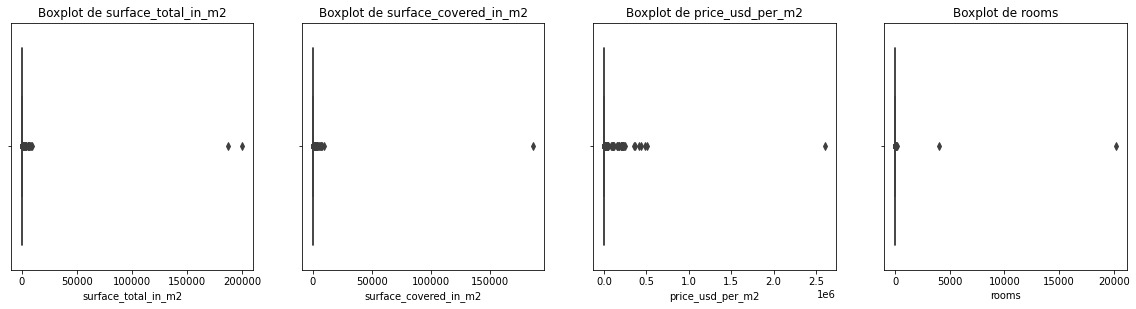

In [95]:
plt.figure(figsize = (20,10))
for i, columna in enumerate(nuemerical_cols):
  plt.subplot(2,4,i+1)
  sns.boxplot(x=data[columna])
  plt.title('Boxplot de ' + str(columna))
plt.show()

In [96]:
#Si usamos rango intercuartilico

dictio_IQR = {}
for columna in nuemerical_cols:
  Q1 = data[columna].quantile(0.25)
  Q3 = data[columna].quantile(0.75)
  IQR = Q3-Q1
  min_IQR = Q1 - 3/2*IQR
  max_IQR = Q3 + 3/2*IQR
  dictio_IQR[columna] = [min_IQR, max_IQR]
  mascara_outliers = np.logical_or(data[columna] < min_IQR, data[columna] > max_IQR)
  print(str(columna) + ':','Perdemos',mascara_outliers.sum(), 'instancias')

surface_total_in_m2: Perdemos 2641 instancias
surface_covered_in_m2: Perdemos 2556 instancias
price_usd_per_m2: Perdemos 2265 instancias
rooms: Perdemos 102 instancias


### IQR

In [97]:
print(data.shape)

#mascara_outliers = np.logical_and(
#np.logical_not(np.logical_or(data['price'] < dictio_IQR['price'][0]  , data['price'] > dictio_IQR['price'][1])),
#np.logical_not(np.logical_or(data['price_aprox_local_currency'] < dictio_IQR['price_aprox_local_currency'][0]  , data['price_aprox_local_currency'] > dictio_IQR['price_aprox_local_currency'][1])))
#print(mascara_outliers.sum())
#data = data[mascara_outliers]
#print(data.shape)

mascara_outliers1 = np.logical_and(
np.logical_not(np.logical_or(data['rooms'] < dictio_IQR['rooms'][0]  , data['rooms'] > dictio_IQR['rooms'][1])),
np.logical_not(np.logical_or(data['surface_total_in_m2'] < dictio_IQR['surface_total_in_m2'][0]  , data['surface_total_in_m2'] > dictio_IQR['surface_total_in_m2'][1])))
print(mascara_outliers1.sum())
data = data[mascara_outliers1]
print(data.shape)

mascara_outliers2 = np.logical_and(
np.logical_not(np.logical_or(data['surface_covered_in_m2'] < dictio_IQR['surface_covered_in_m2'][0]  , data['surface_covered_in_m2'] > dictio_IQR['surface_covered_in_m2'][1])),
np.logical_not(np.logical_or(data['price_usd_per_m2'] < dictio_IQR['price_usd_per_m2'][0]  , data['price_usd_per_m2'] > dictio_IQR['price_usd_per_m2'][1])))
print(mascara_outliers2.sum())
data = data[mascara_outliers2]
print(data.shape)

#mascara_outliers3 = np.logical_and(
#np.logical_not(np.logical_or(data['price_per_m2'] < dictio_IQR['price_per_m2'][0]  , data['price_per_m2'] > dictio_IQR['price_per_m2'][1])),
#np.logical_not(np.logical_or(data['rooms'] < dictio_IQR['rooms'][0]  , data['rooms'] > dictio_IQR['rooms'][1])))
#print(mascara_outliers3.sum())
#data = data[mascara_outliers3]
#print(data.shape)


(29315, 11)
26643
(26643, 11)
24397
(24397, 11)


In [41]:
29315-24758

4557

Perderiamos 4557 instancias usando IQR

Nuevos boxplot quedarian asi:

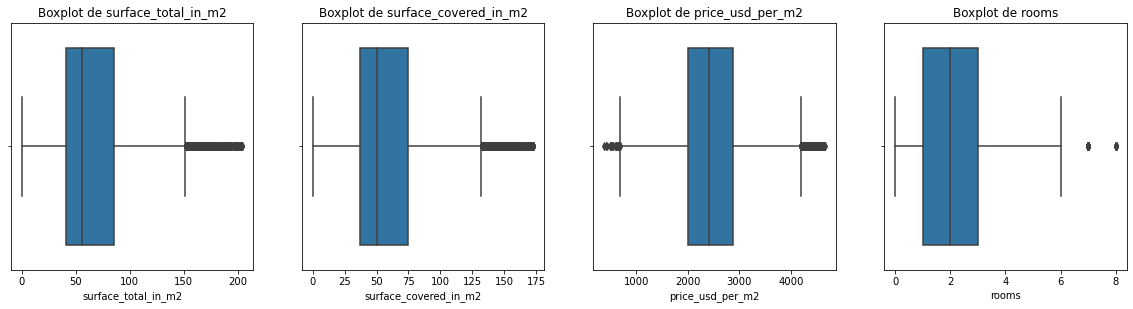

In [98]:
plt.figure(figsize = (20,10))
for i, columna in enumerate(nuemerical_cols):
  plt.subplot(2,4,i+1)
  sns.boxplot(x=data[columna])
  plt.title('Boxplot de ' + str(columna))
plt.show()

Vemos que los boxplot ya se ven bastante mas parecido a lo que acostumbramos a revisar en clases, mucho menos presencia de outliers.

In [99]:
print(data.isnull().sum())

df.isnull().sum()

property_type                 0
place_name                    0
place_with_parent_names       0
state_name                    0
currency                   2014
surface_total_in_m2         686
surface_covered_in_m2      1665
price_usd_per_m2           2506
rooms                      4414
description                   0
title                         0
dtype: int64


property_type                     0
place_name                        0
place_with_parent_names           0
state_name                        0
geonames_id                    1160
lat-lon                        7496
lat                            7496
lon                            7496
price                          2243
currency                       2243
price_aprox_local_currency     2243
price_aprox_usd                2243
surface_total_in_m2             689
surface_covered_in_m2          1878
price_usd_per_m2               2737
price_per_m2                   3751
floor                         26342
rooms                          5359
description                       0
title                             0
dtype: int64

Dejaremos afuera las propiedades de menos de 15 m2 por criterio propio y tambien los nulos de la columna.

In [101]:
data=data[data.surface_total_in_m2>15]


In [100]:
data.isnull().sum()

property_type                 0
place_name                    0
place_with_parent_names       0
state_name                    0
currency                   2014
surface_total_in_m2         686
surface_covered_in_m2      1665
price_usd_per_m2           2506
rooms                      4414
description                   0
title                         0
dtype: int64

## IMPUTACIONES FINALES

Considerando que price_usd_per_m2 es nuestra variable target, y que ya imputamos muchos datos, los nulos restantes seran dropeados, con fin de evitar mayor sesgo. Estos representan el 7,7% de los datos.

In [102]:
#Eliminamos algunas columnas que ya no usaremos.

data.drop(["place_with_parent_names","state_name","currency","title"],axis=1,inplace=True)

In [103]:
data.price_usd_per_m2.isnull().mean()

0.07662123961014303

In [104]:
#Dropearemos los nulos del target, ya que es un 7%. Preferimos eso antes que imputar y sesgar el modelo.

data.dropna(subset=["price_usd_per_m2"],axis=0,inplace=True)


In [105]:
data.isnull().mean()

property_type            0.000000
place_name               0.000000
surface_total_in_m2      0.000000
surface_covered_in_m2    0.037514
price_usd_per_m2         0.000000
rooms                    0.160430
description              0.000000
dtype: float64

In [106]:
# Vamos a crear diferentes sets para averiguar las filas en las que faltan al 
# menos un valor de rooms o superficie cubierta 

msc= data[data.surface_covered_in_m2.isnull()]
mb= data[data.rooms.isna()]
mb_list=[]
for i in mb.index:
  mb_list.append(i)
print(len(mb_list))
msc_list=[]
for i in msc.index:
   msc_list.append(i)
print(len(msc_list))

mb_list=set(mb_list)

msc_list=set(msc_list)
missing_rows= mb_list | msc_list 
print('Nuestro espacio missing tiene',len(missing_rows),'filas')

3511
821
Nuestro espacio missing tiene 4071 filas


In [107]:

#Acá podemos ver que tenemos al menos un dato faltante por instancia.
# Vamos a usar esto para poder verificar que el imputador haya realizado un desempeño descente

data.loc[missing_rows]

,property_type,place_name,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,rooms,description
106496,apartment,Palermo,49.0,NaN,3673.469388,NaN,Venta de Departamento 3 AMBIENTES en PalermoDe...
90113,apartment,Villa Crespo,50.0,42.0,3353.974200,NaN,Los Desarrolladores de Grandes Emprendimientos...
8,apartment,Belgrano,65.0,60.0,3000.000000,NaN,EXCELENTE DOS AMBIENTES ESTRENAR AMPLIO SUPER...
49161,PH,Capital Federal,78.0,55.0,2115.384615,NaN,Buen PH ubicado estratÃ©gicamente a 2 cuadras ...
90122,apartment,Villa Crespo,35.0,30.0,3331.477714,NaN,Los Desarrolladores de Grandes Emprendimientos...
...,...,...,...,...,...,...,...
106487,apartment,Capital Federal,57.0,49.0,1675.438596,NaN,Venta de Departamento 2 AMBIENTES en el Centro...
81912,apartment,Caballito,32.0,29.0,2919.218750,NaN,¡OPORTUNIDAD! VENTA Mono-ambiente A ESTRENAR c...
73724,apartment,Palermo,37.0,34.0,3972.972973,NaN,Depto 1AMB - 37m2 Totales (34cub + 3 balcon) ...
98301,house,Liniers,180.0,NaN,1055.555556,3.0,VENTA DE CASA EN LINIERS. LOTE PROPIO 3 AMBIEN...


### Imputacion KNN 

Para los nulos restantes de rooms y surface_covered_in_m2, utilizaremos KNN para imputarlos.

In [108]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [110]:


data[['surface_covered_in_m2',"rooms"]] = scaler.fit_transform(data[['surface_covered_in_m2',"rooms"]])

round(data.describe(),2)



,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,rooms
count,21885.0,21064.00,21885.00,18374.00
mean,68.7,-0.00,2470.65,0.00
std,37.3,1.00,704.56,1.00
min,16.0,-1.89,375.00,-2.02
25%,41.0,-0.75,2000.00,-1.18
50%,56.0,-0.34,2410.48,-0.34
75%,85.0,0.43,2875.64,0.49
max,204.0,3.47,4649.40,4.68


In [111]:
%%time
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2,weights='uniform',metric='nan_euclidean')
x= data[['surface_total_in_m2','surface_covered_in_m2',"rooms","price_usd_per_m2"]]
x=imputer.fit_transform(x)
data.loc[:,['surface_total_in_m2','surface_covered_in_m2',"rooms","price_usd_per_m2"]]= x

CPU times: user 3.62 s, sys: 4.8 s, total: 8.41 s
Wall time: 3.5 s


Una vez imputados los datos, desescalamos el dataframe para poder apreciar las diferentes magnitudes de los features imputados

In [112]:
data[['surface_covered_in_m2',"rooms"]] = scaler.inverse_transform(data[['surface_covered_in_m2',"rooms"]])

In [113]:
data.loc[missing_rows].head(2)

,property_type,place_name,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,rooms,description
106496,apartment,Palermo,49.0,43.0,3673.469388,2.0,Venta de Departamento 3 AMBIENTES en PalermoDe...
90113,apartment,Villa Crespo,50.0,42.0,3353.974200,1.5,Los Desarrolladores de Grandes Emprendimientos...


In [114]:
data.isnull().sum()

data.dropna(subset=["rooms"],axis=0,inplace=True)

data.dropna(subset=["surface_covered_in_m2"],axis=0,inplace=True)

### CLUSTERING

Agregaremos algunas features, referentes a la clusterizacion de place_name para ver si nos pueden enriquecer en algo el analisis.

In [115]:
data

,property_type,place_name,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,rooms,description
0,PH,Mataderos,55.0,40.0,1127.272727,2.0,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,..."
2,apartment,Mataderos,55.0,55.0,1309.090909,2.0,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...
7,apartment,Belgrano,45.0,40.0,3066.666667,1.0,EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER...
8,apartment,Belgrano,65.0,60.0,3000.000000,3.0,EXCELENTE DOS AMBIENTES ESTRENAR AMPLIO SUPER...
13,apartment,Palermo Soho,50.0,30.0,2234.000000,1.0,Torre I Mondrian. 3 ambientes con terraza y d...
...,...,...,...,...,...,...,...
121157,apartment,Belgrano,38.0,35.0,3368.421053,1.0,Torre de 16º pisos ubicado en pleno centro com...
121158,apartment,Recoleta,44.0,39.0,3750.000000,1.0,Excelente Ubicación - Avenida Pueyrredon y Las...
121160,apartment,Belgrano,157.0,134.5,2611.464968,4.5,Edificio en esquina de muy buena categoría de ...
121217,apartment,Villa Urquiza,46.0,39.0,2858.695652,1.0,VENTA DEPARTAMENTO AMBIENTE DIVISIBLE A ESTREN...


In [116]:
data['valorMedio_M2_Barrio'] = data.groupby(['place_name'])['price_usd_per_m2'].transform('mean')

In [117]:
X_valorMedio=data.drop(['property_type', 'place_name','surface_total_in_m2', 'surface_covered_in_m2',
       'price_usd_per_m2', 'rooms',"description"],axis=1)

In [118]:
X_valorMedio_2d = X_valorMedio.values.reshape(-1,1)


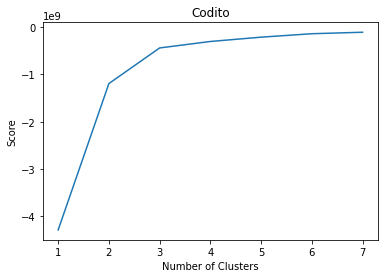

In [119]:
from sklearn.cluster import KMeans
# Graficamos el score para distintos cantidad de cluster's. Seleccionamos el codo de la curva de scores.
Nc = range(1, 8)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X_valorMedio_2d).score(X_valorMedio_2d) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Codito')
plt.show()

In [120]:
from sklearn.cluster import KMeans

# Especificamos el numero adecuado de clusters
# Elegimos n_clusters = 4
kmeans_1 = KMeans(n_clusters=4, random_state=42)

In [121]:
kmeans_1.fit(X_valorMedio_2d)

KMeans(n_clusters=4, random_state=42)

In [122]:
y_kmeans = kmeans_1.predict(X_valorMedio_2d)

centros_1 = kmeans_1.cluster_centers_
print(centros_1)

[[2240.91966589]
 [3011.00563017]
 [2491.29170155]
 [1905.73450212]]


In [123]:
#Consultamos las etiquetas
etiquetas_1 = kmeans_1.labels_

#Number of clusters in labels, ignoring noise if present.
n_clusters_1 = len(set(etiquetas_1)) - (1 if -1 in etiquetas_1 else 0)
n_noise_1 = list(etiquetas_1).count(-1)

In [124]:
print('Estimated number of clusters: %d' % n_clusters_1)
print('Estimated number of noise points: %d' % n_noise_1)


Estimated number of clusters: 4
Estimated number of noise points: 0


In [125]:
#Inserto nueva columna en data con los valores de clusters del K-Means
data['Kmeans_Barrio']=kmeans_1.labels_
data.head()

,property_type,place_name,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,rooms,description,valorMedio_M2_Barrio,Kmeans_Barrio
0,PH,Mataderos,55.0,40.0,1127.272727,2.0,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",1722.332561,3
2,apartment,Mataderos,55.0,55.0,1309.090909,2.0,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,1722.332561,3
7,apartment,Belgrano,45.0,40.0,3066.666667,1.0,EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER...,2995.189293,1
8,apartment,Belgrano,65.0,60.0,3000.000000,3.0,EXCELENTE DOS AMBIENTES ESTRENAR AMPLIO SUPER...,2995.189293,1
13,apartment,Palermo Soho,50.0,30.0,2234.000000,1.0,Torre I Mondrian. 3 ambientes con terraza y d...,3058.656824,1


In [126]:
# Hacemos dummies al cluster por barrios
data = pd.get_dummies(data, columns = ['Kmeans_Barrio'])
data

,property_type,place_name,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,rooms,description,valorMedio_M2_Barrio,Kmeans_Barrio_0,Kmeans_Barrio_1,Kmeans_Barrio_2,Kmeans_Barrio_3
0,PH,Mataderos,55.0,40.0,1127.272727,2.0,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",1722.332561,0,0,0,1
2,apartment,Mataderos,55.0,55.0,1309.090909,2.0,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,1722.332561,0,0,0,1
7,apartment,Belgrano,45.0,40.0,3066.666667,1.0,EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER...,2995.189293,0,1,0,0
8,apartment,Belgrano,65.0,60.0,3000.000000,3.0,EXCELENTE DOS AMBIENTES ESTRENAR AMPLIO SUPER...,2995.189293,0,1,0,0
13,apartment,Palermo Soho,50.0,30.0,2234.000000,1.0,Torre I Mondrian. 3 ambientes con terraza y d...,3058.656824,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
121157,apartment,Belgrano,38.0,35.0,3368.421053,1.0,Torre de 16º pisos ubicado en pleno centro com...,2995.189293,0,1,0,0
121158,apartment,Recoleta,44.0,39.0,3750.000000,1.0,Excelente Ubicación - Avenida Pueyrredon y Las...,3113.870080,0,1,0,0
121160,apartment,Belgrano,157.0,134.5,2611.464968,4.5,Edificio en esquina de muy buena categoría de ...,2995.189293,0,1,0,0
121217,apartment,Villa Urquiza,46.0,39.0,2858.695652,1.0,VENTA DEPARTAMENTO AMBIENTE DIVISIBLE A ESTREN...,2508.380870,0,0,1,0


In [127]:
# Tiramos las variables auxiliares creadas
data.drop(columns=[ 'valorMedio_M2_Barrio'], inplace=True)
data.head()

,property_type,place_name,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,rooms,description,Kmeans_Barrio_0,Kmeans_Barrio_1,Kmeans_Barrio_2,Kmeans_Barrio_3
0,PH,Mataderos,55.0,40.0,1127.272727,2.0,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",0,0,0,1
2,apartment,Mataderos,55.0,55.0,1309.090909,2.0,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,0,0,0,1
7,apartment,Belgrano,45.0,40.0,3066.666667,1.0,EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER...,0,1,0,0
8,apartment,Belgrano,65.0,60.0,3000.000000,3.0,EXCELENTE DOS AMBIENTES ESTRENAR AMPLIO SUPER...,0,1,0,0
13,apartment,Palermo Soho,50.0,30.0,2234.000000,1.0,Torre I Mondrian. 3 ambientes con terraza y d...,0,1,0,0


In [128]:
#hay un registro que tiene rooms en 0. Lo dropeamos

data["rooms"]=data.rooms.astype(int)
data=data[data.rooms>0]


## DUMMIES

Crearemos dummies de algunas variables categoricas 

In [129]:
#Hacemos dummies de property_type

data = pd.get_dummies(data, columns=['property_type'],prefix="propiedad_")

In [130]:
#Hacemos dummies de place_name

data = pd.get_dummies(data, columns=['place_name'],prefix="place_name_")

### Ammenities

Tal como hablamos en la entrega pasada, buscamos algunos elementos en la columna description que creemos, pueden influir de alguna manera en el precio. Estas, las covertimos en dummies.

In [131]:
#Buscamos una lista de atributos que para nosotros, son ammenities con influencia, para utilizarlos en el modelo predictivo

pattern_suffix = "balcón"

cadena_reemplazo = "balcon"

pattern_suffix_regex = re.compile(pattern_suffix,re.IGNORECASE)

data["description"] = data.description.apply(lambda x: pattern_suffix_regex.sub(cadena_reemplazo, str(x)))



lista_atributos=['jardin','cochera','seguridad',"parrilla",'pileta','terraza','subte','lavadero',"quincho","a estrenar", "balcon", "gimnasio"]

def description_search(lista_atributos):
    for i in lista_atributos:
        atributo=i
        regex_atributo=re.compile(i, re.IGNORECASE)
        atributos_results=data.description.apply(lambda x : x if x is np.NaN else regex_atributo.search(x))
        print(i,atributos_results.notnull().sum())
        data[[i]]= atributos_results.notnull().astype(int) #agrega columna, diciendo si tiene tal atributo

description_search(lista_atributos)



jardin 598
cochera 7357
seguridad 2643
parrilla 5789
pileta 1682
terraza 5523
subte 4902
lavadero 5666
quincho 587
a estrenar 2338
balcon 11503
gimnasio 1662


In [132]:
data.drop("description",inplace=True,axis=1)

In [133]:
data["rooms"]=data.rooms.astype(int)
data

,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,rooms,Kmeans_Barrio_0,Kmeans_Barrio_1,Kmeans_Barrio_2,Kmeans_Barrio_3,propiedad__PH,propiedad__apartment,propiedad__house,place_name__Abasto,place_name__Agronomía,place_name__Almagro,place_name__Balvanera,place_name__Barracas,place_name__Barrio Norte,place_name__Belgrano,place_name__Boca,place_name__Boedo,place_name__Caballito,place_name__Capital Federal,place_name__Centro / Microcentro,place_name__Chacarita,place_name__Coghlan,place_name__Colegiales,place_name__Congreso,place_name__Constitución,place_name__Flores,place_name__Floresta,place_name__Las Cañitas,place_name__Liniers,place_name__Mataderos,place_name__Monserrat,place_name__Monte Castro,place_name__Nuñez,place_name__Once,place_name__Palermo,place_name__Palermo Chico,place_name__Palermo Hollywood,place_name__Palermo Soho,place_name__Palermo Viejo,place_name__Parque Avellaneda,place_name__Parque Centenario,place_name__Parque Chacabuco,place_name__Parque Chas,place_name__Parque Patricios,place_name__Paternal,place_name__Pompeya,place_name__Puerto Madero,place_name__Recoleta,place_name__Retiro,place_name__Saavedra,place_name__San Cristobal,place_name__San Nicolás,place_name__San Telmo,place_name__Tribunales,place_name__Velez Sarsfield,place_name__Versalles,place_name__Villa Crespo,place_name__Villa Devoto,place_name__Villa General Mitre,place_name__Villa Lugano,place_name__Villa Luro,place_name__Villa Ortuzar,place_name__Villa Pueyrredón,place_name__Villa Real,place_name__Villa Riachuelo,place_name__Villa Santa Rita,place_name__Villa Soldati,place_name__Villa Urquiza,place_name__Villa del Parque,jardin,cochera,seguridad,parrilla,pileta,terraza,subte,lavadero,quincho,a estrenar,balcon,gimnasio
0,55.0,40.0,1127.272727,2,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,55.0,55.0,1309.090909,2,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
7,45.0,40.0,3066.666667,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
8,65.0,60.0,3000.000000,3,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
13,50.0,30.0,2234.000000,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121157,38.0,35.0,3368.421053,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1
121158,44.0,39.0,3750.000000,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
121160,157.0,134.5,2611.464968,4,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
121217,46.0,39.0,2858.695652,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,1,0,0,1,1,0


## ESCALADO Y NORMALIZACION DE LOS DATOS

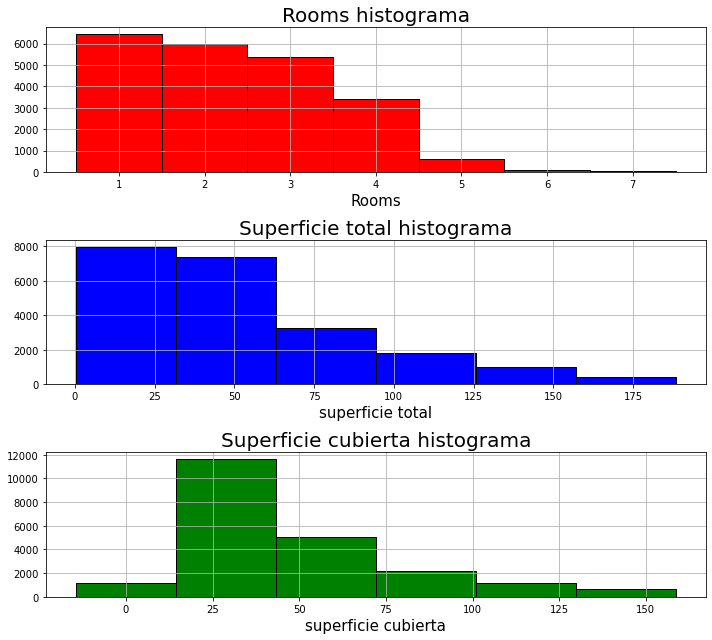

In [134]:
plt.figure(figsize=(10,9))

plt.subplot(3,1,1)
plt.title('Rooms histograma', fontsize=20)
data.rooms.hist(label = 'rooms', color='r',bins=7,align='left',edgecolor='black')
plt.xlabel('Rooms',fontsize=15)

plt.subplot(3,1,2)
plt.title('Superficie total histograma', fontsize=20)
data.surface_total_in_m2.hist(label = 'superficie total', color='b',bins=6,align='left',edgecolor='black')
plt.xlabel('superficie total',fontsize=15)

plt.subplot(3,1,3)
plt.title('Superficie cubierta histograma', fontsize=20)
data.surface_covered_in_m2.hist(label = 'superficie cubierta', color='g',bins=6,align='left',edgecolor='black')
plt.xlabel('superficie cubierta',fontsize=15)

plt.tight_layout()
plt.show()



In [135]:
X = data.drop(['price_usd_per_m2'],axis=1)
y= data.price_usd_per_m2


In [136]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(15318, 83) (15318,) (6566, 83) (6566,)


In [137]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [138]:
columnas=['surface_total_in_m2', 'surface_covered_in_m2',
       'rooms']

In [139]:
for columna in columnas:
  X_train[[columna]] = scaler.fit_transform(X_train[[columna]])
  X_test[[columna]] = scaler.fit_transform(X_test[[columna]])

round(X_train.describe(),2)

,surface_total_in_m2,surface_covered_in_m2,rooms,Kmeans_Barrio_0,Kmeans_Barrio_1,Kmeans_Barrio_2,Kmeans_Barrio_3,propiedad__PH,propiedad__apartment,propiedad__house,place_name__Abasto,place_name__Agronomía,place_name__Almagro,place_name__Balvanera,place_name__Barracas,place_name__Barrio Norte,place_name__Belgrano,place_name__Boca,place_name__Boedo,place_name__Caballito,place_name__Capital Federal,place_name__Centro / Microcentro,place_name__Chacarita,place_name__Coghlan,place_name__Colegiales,place_name__Congreso,place_name__Constitución,place_name__Flores,place_name__Floresta,place_name__Las Cañitas,place_name__Liniers,place_name__Mataderos,place_name__Monserrat,place_name__Monte Castro,place_name__Nuñez,place_name__Once,place_name__Palermo,place_name__Palermo Chico,place_name__Palermo Hollywood,place_name__Palermo Soho,place_name__Palermo Viejo,place_name__Parque Avellaneda,place_name__Parque Centenario,place_name__Parque Chacabuco,place_name__Parque Chas,place_name__Parque Patricios,place_name__Paternal,place_name__Pompeya,place_name__Puerto Madero,place_name__Recoleta,place_name__Retiro,place_name__Saavedra,place_name__San Cristobal,place_name__San Nicolás,place_name__San Telmo,place_name__Tribunales,place_name__Velez Sarsfield,place_name__Versalles,place_name__Villa Crespo,place_name__Villa Devoto,place_name__Villa General Mitre,place_name__Villa Lugano,place_name__Villa Luro,place_name__Villa Ortuzar,place_name__Villa Pueyrredón,place_name__Villa Real,place_name__Villa Riachuelo,place_name__Villa Santa Rita,place_name__Villa Soldati,place_name__Villa Urquiza,place_name__Villa del Parque,jardin,cochera,seguridad,parrilla,pileta,terraza,subte,lavadero,quincho,a estrenar,balcon,gimnasio
count,15318.00,15318.00,15318.00,15318.0,15318.00,15318.00,15318.00,15318.00,15318.00,15318.00,15318.00,15318.00,15318.00,15318.00,15318.00,15318.00,15318.00,15318.00,15318.00,15318.00,15318.00,15318.00,15318.00,15318.00,15318.00,15318.00,15318.00,15318.00,15318.00,15318.00,15318.00,15318.00,15318.00,15318.00,15318.00,15318.00,15318.00,15318.00,15318.00,15318.00,15318.00,15318.00,15318.00,15318.00,15318.00,15318.00,15318.00,15318.00,15318.00,15318.00,15318.00,15318.00,15318.00,15318.00,15318.00,15318.00,15318.00,15318.00,15318.00,15318.00,15318.00,15318.00,15318.00,15318.00,15318.00,15318.00,15318.00,15318.00,15318.00,15318.00,15318.00,15318.00,15318.00,15318.00,15318.00,15318.00,15318.00,15318.00,15318.00,15318.00,15318.00,15318.00,15318.00
mean,0.00,-0.00,0.00,0.2,0.33,0.24,0.24,0.06,0.92,0.02,0.00,0.00,0.04,0.02,0.01,0.04,0.09,0.01,0.02,0.08,0.02,0.01,0.01,0.01,0.01,0.01,0.01,0.05,0.02,0.00,0.01,0.01,0.02,0.00,0.03,0.01,0.09,0.00,0.02,0.01,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.05,0.01,0.02,0.01,0.01,0.05,0.00,0.00,0.00,0.05,0.01,0.00,0.01,0.01,0.00,0.01,0.00,0.00,0.00,0.00,0.06,0.02,0.03,0.34,0.12,0.26,0.08,0.25,0.22,0.26,0.03,0.11,0.52,0.08
std,1.00,1.00,1.00,0.4,0.47,0.43,0.43,0.24,0.28,0.14,0.06,0.04,0.19,0.15,0.12,0.18,0.29,0.09,0.12,0.28,0.14,0.08,0.09,0.10,0.11,0.11,0.09,0.21,0.13,0.07,0.10,0.10,0.14,0.05,0.16,0.07,0.28,0.06,0.14,0.11,0.04,0.05,0.05,0.07,0.04,0.10,0.08,0.04,0.05,0.21,0.08,0.15,0.12,0.08,0.21,0.06,0.03,0.04,0.21,0.11,0.04,0.08,0.12,0.06,0.08,0.04,0.01,0.05,0.03,0.23,0.13,0.16,0.47,0.33,0.44,0.26,0.43,0.42,0.44,0.16,0.31,0.50,0.27
min,-1.39,-1.91,-1.17,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,-0.75,-0.75,-1.17,0.0,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00

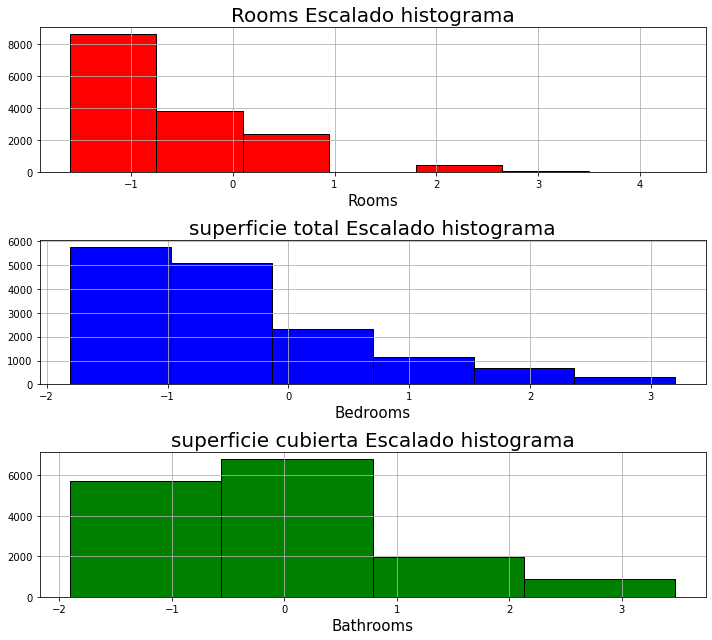

In [140]:
plt.figure(figsize=(10,9))

plt.subplot(3,1,1)
plt.title('Rooms Escalado histograma', fontsize=20)
X_train.rooms.hist(label = 'rooms', color='r',bins=7,align='left',edgecolor='black')
plt.xlabel('Rooms',fontsize=15)

plt.subplot(3,1,2)
plt.title('superficie total Escalado histograma', fontsize=20)
X_train.surface_total_in_m2.hist(label = 'superficie total', color='b',bins=6,align='left',edgecolor='black')
plt.xlabel('Bedrooms',fontsize=15)

plt.subplot(3,1,3)
plt.title('superficie cubierta Escalado histograma', fontsize=20)
X_train.surface_covered_in_m2.hist(label = 'superficie cubierta', color='green',bins=4,align='mid',edgecolor='black')
plt.xlabel('Bathrooms',fontsize=15)



plt.tight_layout()
plt.show()

## Principal Component Analysis

Para la reducción de dimensionalidad voy a utilizar la técnica del PCA.

In [141]:
X_PCA_train = X_train.copy() 
X_PCA_test = X_test.copy()

In [142]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10,random_state=42)

In [143]:
X_PCA_train= pca.fit_transform(X_PCA_train)
X_PCA_test= pca.transform(X_PCA_test)

In [144]:
X_PCA_train.shape, X_PCA_test.shape

((15318, 10), (6566, 10))

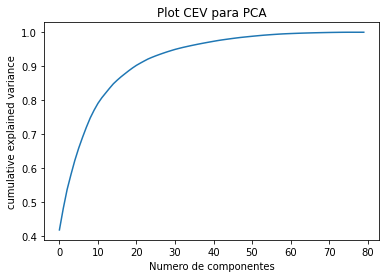

In [145]:
pca = PCA(80).fit(X_test)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title("Plot CEV para PCA")
plt.xlabel('Numero de componentes')
plt.ylabel('cumulative explained variance');

## MODELOS


Funciones que usaremos:

In [146]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, cross_validate, StratifiedKFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso


In [147]:
def evaluacion_modelo(modelo,X_train,X_test,y_train,y_test):

#Esta función sirve para, dado X modelo que ya se ajustaron los datos de 
#entrenamiento X_train mediante el método modelo.fit(X_trian,y_train), 
#devuelve las métricas de RMSE / R^2 / R^2*ajustado. A su vez, para cada métrica,
#devuelve la variación entre el conjunto de train y test.

  #%%time
  from sklearn.metrics import r2_score
  from sklearn.metrics import mean_squared_error
  from sklearn.metrics import mean_absolute_error


  y_train_pred = modelo.predict(X_train)
  y_test_pred = modelo.predict(X_test)

  rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
  rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
  print("------ --------  --------")
  print(f'Raíz del error cuadrático medio en Train: ', round(rmse_train,4))
  print(f'Raíz del error cuadrático medio en Test:', round(rmse_test,4))
  print('La variación de esta métrica es igual a',np.abs(rmse_train-rmse_test))
  print("------ --------  --------")

  r2_train = r2_score(y_train, y_train_pred)
  r2_test = r2_score(y_test, y_test_pred)
  print("La calidad del modelo en el conjunto de Train", round(r2_train, 3)*100, '%')
  print("La calidad del modelo en el conjunto de Test:", round(r2_test, 3)*100, '%')
  print('La variación de esta métrica es igual a',np.abs(r2_train-r2_test)*100,'%')
  print("------ --------  --------")

  r2a_train= adjustedR2(r2_train,X_train.shape[0], X_train.shape[1])
  r2a_test= adjustedR2(r2_test,X_test.shape[0], X_test.shape[1])
  print('El R cuadrado ajustado para el Train es', round( r2a_train,3)*100, '%')
  print('El R cuadrado ajustado para el Test es', round(r2a_test,3)*100, '%')
  print('La variación de esta métrica es igual a',np.abs(r2_train-r2_test)*100,'%')
  plt.figure(figsize = (14,4))
   
  ax = plt.subplot(1,2,1)
  ax.scatter(y_test,y_test_pred, s =2,color='brown')
    
  lims = [np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
        np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
        ]
    
  ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0,linewidth= 3)
  plt.title('Predicción vs. Real')
  plt.xlabel('y (test)')
  plt.ylabel('y_pred (test)')

  plt.subplot(1,2,2)  
  sns.distplot(y_train - y_train_pred, bins = 20, label = 'train',color='blue')
  sns.distplot(y_test - y_test_pred, bins = 20, label = 'test',color='red')
  plt.title('Distribucón del Error')
  plt.xlabel('errores')
  plt.legend()

  plt.tight_layout()
  plt.show()

In [148]:
def reduce_mem_usage(df, verbose=True):

 #Función para reducir el almacenamiento usado por un dataframe
 #mediante la reducción de sus dtypes al mínimo admisible por la característica
 # de su columna

    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df

In [149]:
#Métrica para hallar el R^2 ajustado:
# Siendo n = número de muestras y k = cantidad de parámetros
def adjustedR2(r2,n,k):
    return 1- (((n-1)/(n-k-1))*(1-r2))

## Optimizacion de hiperparametros

### max depth para el arbol de decision

In [150]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn import linear_model

Text(0, 0.5, 'R^2')

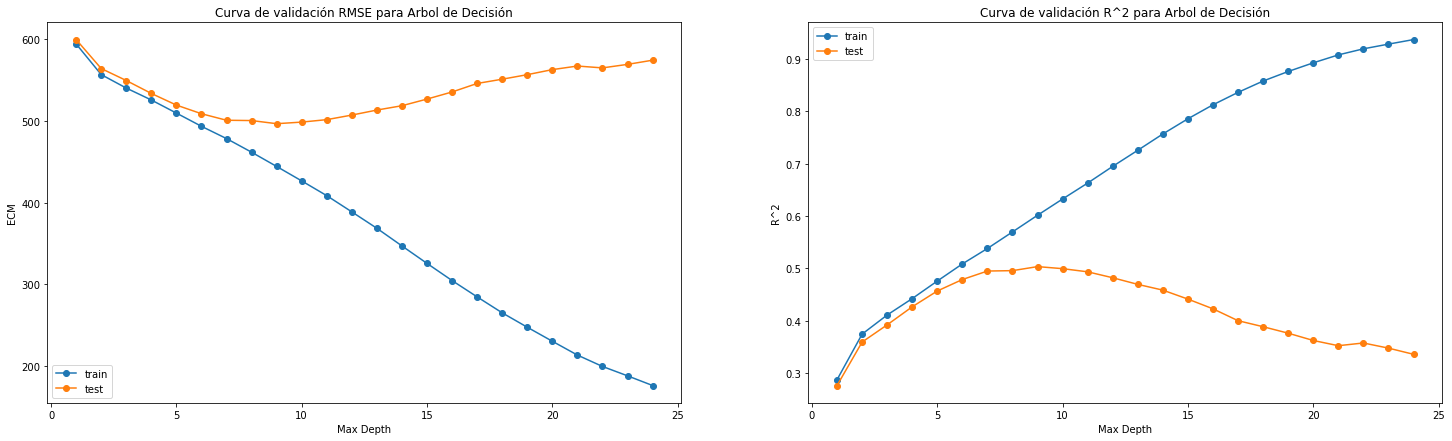

In [151]:
from sklearn.tree import DecisionTreeRegressor

lista_accuracy_train = []
lista_accuracy_test = []
lista_ecm_train = []
lista_ecm_test = []

# Definimos la lista de valores de k que vamos a explorar, en este caso del 1 al 11
max_depth = range(1,25)

# Generamos un loop sobre los distintos valores de k 
for j in max_depth:
    
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de vecinos deseado
    clf = DecisionTreeRegressor(max_depth=j, random_state=42)
    
    # Entrenar el modelo
    clf.fit(X_train,y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = clf.predict(X_train)
    r2_train = r2_score(y_train, y_train_pred)
    train_ecm = np.sqrt(mean_squared_error(y_train, y_train_pred))

    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = clf.predict(X_test)
    r2_test = r2_score(y_test, y_test_pred)
    test_ecm = np.sqrt(mean_squared_error(y_test, y_test_pred))

    # Agregar la información a las listas
    lista_accuracy_train.append(r2_train)
    lista_accuracy_test.append(r2_test)
    lista_ecm_train.append(train_ecm)
    lista_ecm_test.append(test_ecm)


plt.figure(figsize=(25,7))

plt.subplot(1,2,1)

plt.plot(max_depth,lista_ecm_train,'o-',label='train' )
plt.plot(max_depth,lista_ecm_test,'o-',label='test')
plt.legend()
plt.title("Curva de validación RMSE para Arbol de Decisión")
plt.xlabel("Max Depth")
plt.ylabel("ECM")  

plt.subplot(1,2,2)

plt.plot(max_depth, lista_accuracy_train,'o-',label='train' )
plt.plot(max_depth, lista_accuracy_test,'o-',label='test')
plt.legend()
plt.title("Curva de validación R^2 para Arbol de Decisión")
plt.xlabel("Max Depth")
plt.ylabel("R^2")

## ARBOL sin PCA

------ --------  --------
Raíz del error cuadrático medio en Train:  478.5805
Raíz del error cuadrático medio en Test: 501.0323
La variación de esta métrica es igual a 22.45175722852673
------ --------  --------
La calidad del modelo en el conjunto de Train 53.800000000000004 %
La calidad del modelo en el conjunto de Test: 49.5 %
La variación de esta métrica es igual a 4.311867677757853 %
------ --------  --------
El R cuadrado ajustado para el Train es 53.6 %
El R cuadrado ajustado para el Test es 48.9 %
La variación de esta métrica es igual a 4.311867677757853 %


/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



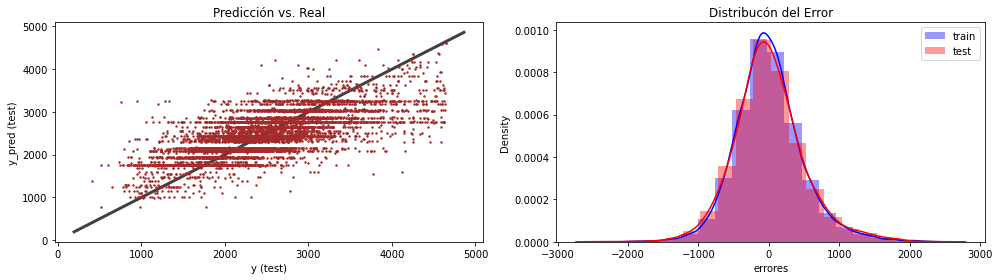

In [152]:
from sklearn.tree import DecisionTreeRegressor

tree_regressor = DecisionTreeRegressor(max_depth=7, random_state=42)

tree_regressor.fit(X_train, y_train)

evaluacion_modelo(tree_regressor,X_train,X_test,y_train,y_test)

In [153]:
reduce_mem_usage(X_train)
reduce_mem_usage(X_test)

Memory usage after optimization is: 1.37 MB
Decreased by 52.0%
Memory usage after optimization is: 0.59 MB
Decreased by 52.0%


,surface_total_in_m2,surface_covered_in_m2,rooms,Kmeans_Barrio_0,Kmeans_Barrio_1,Kmeans_Barrio_2,Kmeans_Barrio_3,propiedad__PH,propiedad__apartment,propiedad__house,place_name__Abasto,place_name__Agronomía,place_name__Almagro,place_name__Balvanera,place_name__Barracas,place_name__Barrio Norte,place_name__Belgrano,place_name__Boca,place_name__Boedo,place_name__Caballito,place_name__Capital Federal,place_name__Centro / Microcentro,place_name__Chacarita,place_name__Coghlan,place_name__Colegiales,place_name__Congreso,place_name__Constitución,place_name__Flores,place_name__Floresta,place_name__Las Cañitas,place_name__Liniers,place_name__Mataderos,place_name__Monserrat,place_name__Monte Castro,place_name__Nuñez,place_name__Once,place_name__Palermo,place_name__Palermo Chico,place_name__Palermo Hollywood,place_name__Palermo Soho,place_name__Palermo Viejo,place_name__Parque Avellaneda,place_name__Parque Centenario,place_name__Parque Chacabuco,place_name__Parque Chas,place_name__Parque Patricios,place_name__Paternal,place_name__Pompeya,place_name__Puerto Madero,place_name__Recoleta,place_name__Retiro,place_name__Saavedra,place_name__San Cristobal,place_name__San Nicolás,place_name__San Telmo,place_name__Tribunales,place_name__Velez Sarsfield,place_name__Versalles,place_name__Villa Crespo,place_name__Villa Devoto,place_name__Villa General Mitre,place_name__Villa Lugano,place_name__Villa Luro,place_name__Villa Ortuzar,place_name__Villa Pueyrredón,place_name__Villa Real,place_name__Villa Riachuelo,place_name__Villa Santa Rita,place_name__Villa Soldati,place_name__Villa Urquiza,place_name__Villa del Parque,jardin,cochera,seguridad,parrilla,pileta,terraza,subte,lavadero,quincho,a estrenar,balcon,gimnasio
42204,0.743164,-0.570801,-0.289551,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0
43586,-0.544922,-0.540039,-0.289551,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0
20281,-0.571777,-0.570801,-0.289551,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
45012,0.474854,0.659180,0.563477,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0
85666,-0.437500,-0.447754,-0.289551,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35857,-0.383789,-0.201782,0.563477,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
61977,0.045502,0.136475,0.563477,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
48652,-0.410645,-0.416992,-1.142578,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0
109641,0.367432,0.659180,0.563477,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0


In [154]:
from sklearn.model_selection import cross_validate

results = cross_validate(tree_regressor, X_train, y_train, cv=5, return_train_score=True, scoring='r2', n_jobs=-1)
print('Mean r2 test: ', np.mean(results['test_score']))

Mean r2 test:  0.49501247659286085


## ARBOL con PCA

------ --------  --------
Raíz del error cuadrático medio en Train:  420.0283
Raíz del error cuadrático medio en Test: 537.9079
La variación de esta métrica es igual a 117.87959201189324
------ --------  --------
La calidad del modelo en el conjunto de Train 64.4 %
La calidad del modelo en el conjunto de Test: 41.8 %
La variación de esta métrica es igual a 22.624021095730416 %
------ --------  --------
El R cuadrado ajustado para el Train es 64.4 %
El R cuadrado ajustado para el Test es 41.699999999999996 %
La variación de esta métrica es igual a 22.624021095730416 %


/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



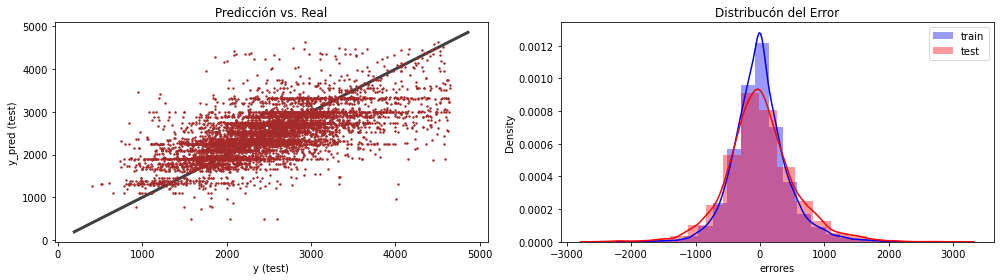

In [155]:
tree_regressor = DecisionTreeRegressor(max_depth=10, random_state=42)

tree_regressor.fit(X_PCA_train, y_train)

evaluacion_modelo(tree_regressor,X_PCA_train,X_PCA_test,y_train,y_test)

## Regresion lineal sin PCA

In [156]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, cross_validate, StratifiedKFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso

------ --------  --------
Raíz del error cuadrático medio en Train:  491.8262
Raíz del error cuadrático medio en Test: 493.8731
La variación de esta métrica es igual a 2.0468770935871134
------ --------  --------
La calidad del modelo en el conjunto de Train 51.2 %
La calidad del modelo en el conjunto de Test: 50.9 %
La variación de esta métrica es igual a 0.2881102120018464 %
------ --------  --------
El R cuadrado ajustado para el Train es 51.0 %
El R cuadrado ajustado para el Test es 50.3 %
La variación de esta métrica es igual a 0.2881102120018464 %


/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



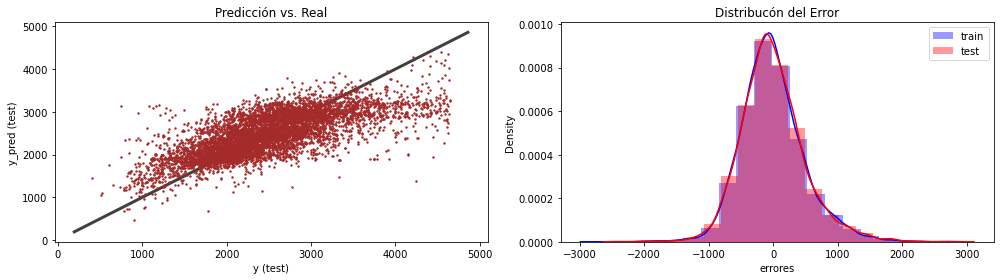

In [157]:
reg = LinearRegression()

reg.fit(X_train, y_train)

evaluacion_modelo(reg,X_train,X_test,y_train,y_test)

## Regresión lineal con atributos polinómicos con PCA

REGRESIÓN CON ATRIBUTOS POLINÓMICOS NUMERO 1
Agregamos atributos hasta la potencia x**1
------ --------  --------
Raíz del error cuadrático medio en Train:  519.8253
Raíz del error cuadrático medio en Test: 525.269
La variación de esta métrica es igual a 5.443706947059127
------ --------  --------
La calidad del modelo en el conjunto de Train 45.5 %
La calidad del modelo en el conjunto de Test: 44.5 %
La variación de esta métrica es igual a 1.0127333832244956 %
------ --------  --------
El R cuadrado ajustado para el Train es 45.5 %
El R cuadrado ajustado para el Test es 44.4 %
La variación de esta métrica es igual a 1.0127333832244956 %


/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



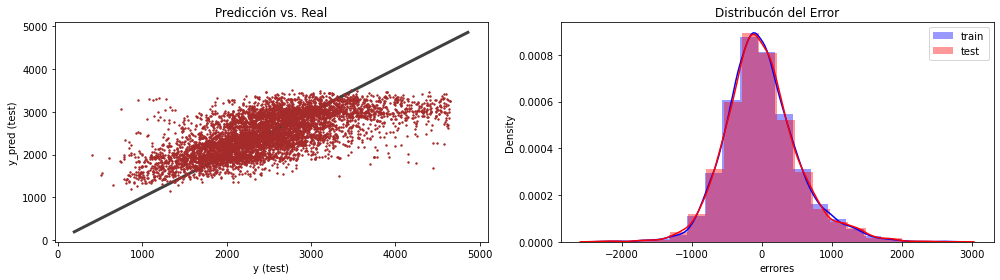

REGRESIÓN CON ATRIBUTOS POLINÓMICOS NUMERO 2
Agregamos atributos hasta la potencia x**2
------ --------  --------
Raíz del error cuadrático medio en Train:  502.0403
Raíz del error cuadrático medio en Test: 503.4496
La variación de esta métrica es igual a 1.4093010200039089
------ --------  --------
La calidad del modelo en el conjunto de Train 49.2 %
La calidad del modelo en el conjunto de Test: 49.0 %
La variación de esta métrica es igual a 0.16239109730012968 %
------ --------  --------
El R cuadrado ajustado para el Train es 49.0 %
El R cuadrado ajustado para el Test es 48.5 %
La variación de esta métrica es igual a 0.16239109730012968 %


/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



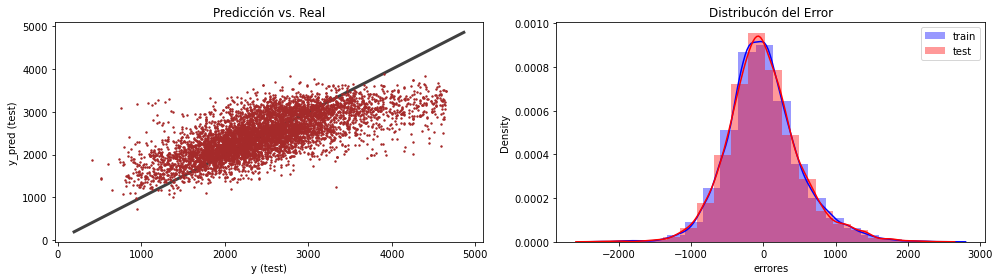

REGRESIÓN CON ATRIBUTOS POLINÓMICOS NUMERO 3
Agregamos atributos hasta la potencia x**3
------ --------  --------
Raíz del error cuadrático medio en Train:  479.7704
Raíz del error cuadrático medio en Test: 485.7441
La variación de esta métrica es igual a 5.973643332056952
------ --------  --------
La calidad del modelo en el conjunto de Train 53.6 %
La calidad del modelo en el conjunto de Test: 52.5 %
La variación de esta métrica es igual a 1.0479856577208402 %
------ --------  --------
El R cuadrado ajustado para el Train es 52.7 %
El R cuadrado ajustado para el Test es 50.4 %
La variación de esta métrica es igual a 1.0479856577208402 %


/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



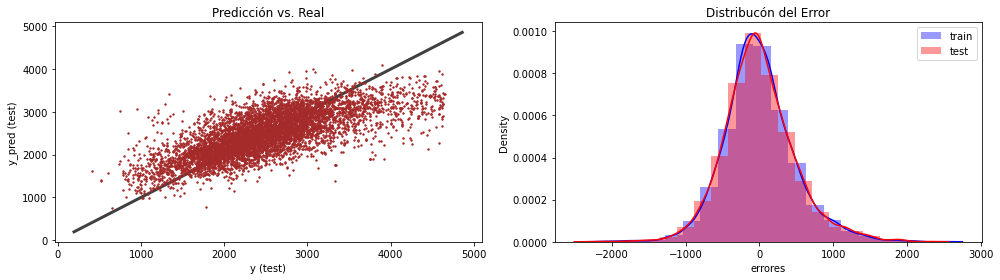

In [158]:
for idx,potencia_maxima in enumerate(range(1,4)):

  print(f'REGRESIÓN CON ATRIBUTOS POLINÓMICOS NUMERO {idx + 1}')
  print(f'Agregamos atributos hasta la potencia x**{potencia_maxima}')

  poly = PolynomialFeatures(degree = potencia_maxima, include_bias=False)  
  X_train1 = poly.fit_transform(X_PCA_train)
  X_test1= poly.fit_transform(X_PCA_test)


  ### ENTRENAMOS
  reg = LinearRegression()
  reg.fit(X_train1, y_train)
    
    
  ### COMPLETAR AQUI PARA RESOLVER CHALLENGE
  #print(f'Pendientes: {reg.coef_}')
  #print(f'Ordenada: {reg.intercept_}')
    
  evaluacion_modelo(reg,X_train1,X_test1,y_train,y_test)

------ --------  --------
Raíz del error cuadrático medio en Train:  479.7704
Raíz del error cuadrático medio en Test: 485.7441
La variación de esta métrica es igual a 5.973643332056952
------ --------  --------
La calidad del modelo en el conjunto de Train 53.6 %
La calidad del modelo en el conjunto de Test: 52.5 %
La variación de esta métrica es igual a 1.0479856577208402 %
------ --------  --------
El R cuadrado ajustado para el Train es 52.7 %
El R cuadrado ajustado para el Test es 50.4 %
La variación de esta métrica es igual a 1.0479856577208402 %


/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



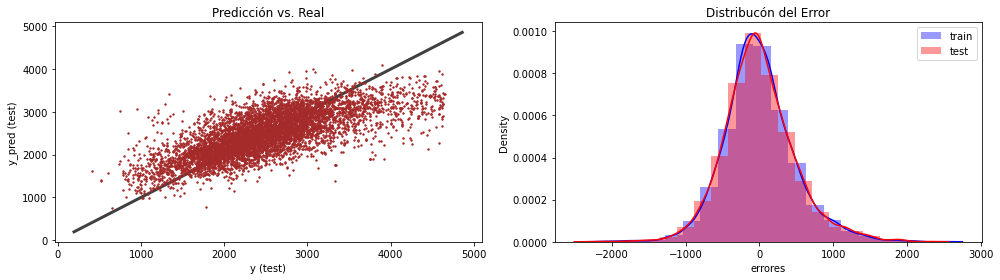

In [159]:
poly = PolynomialFeatures(degree = 3, include_bias=False) 
X_train1 = poly.fit_transform(X_PCA_train)
X_test1= poly.fit_transform(X_PCA_test)

reg = LinearRegression()
reg.fit(X_train1, y_train)

evaluacion_modelo(reg,X_train1,X_test1,y_train,y_test)

## Regularizacion 

### Ridge

------ --------  --------
Raíz del error cuadrático medio en Train:  485.5393
Raíz del error cuadrático medio en Test: 491.4022
La variación de esta métrica es igual a 5.86294032437803
------ --------  --------
La calidad del modelo en el conjunto de Train 52.5 %
La calidad del modelo en el conjunto de Test: 51.4 %
La variación de esta métrica es igual a 1.0372547767059093 %
------ --------  --------
El R cuadrado ajustado para el Train es 51.6 %
El R cuadrado ajustado para el Test es 49.2 %
La variación de esta métrica es igual a 1.0372547767059093 %


/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



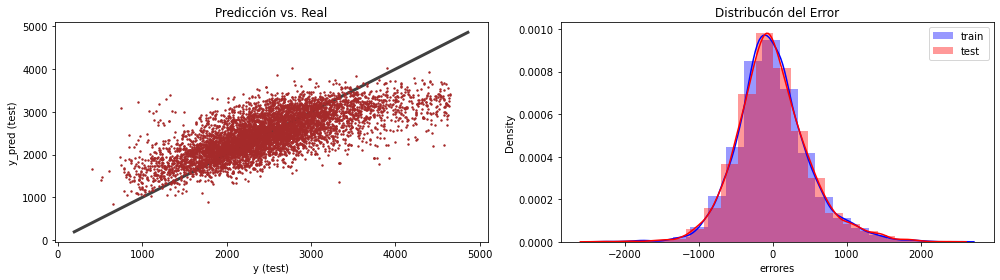

In [160]:
reg_ridge = Ridge(alpha = 10**1, random_state=42)
reg_ridge.fit(X_train1,y_train)
evaluacion_modelo(reg_ridge,X_train1,X_test1,y_train,y_test)

In [161]:
results = cross_validate(reg_ridge, X_train1, y_train, cv=5, 
                         return_train_score=True, 
                         scoring=('r2','neg_root_mean_squared_error'))
print('Mean r2 test: ', np.mean(results['test_r2']))
print('RMSE test: ',np.abs(np.mean(results['test_neg_root_mean_squared_error'])))

Mean r2 test:  0.5062031015687395
RMSE test:  494.6484094418164


### Lasso

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.767e+09, tolerance: 7.598e+05

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



------ --------  --------
Raíz del error cuadrático medio en Train:  480.3329
Raíz del error cuadrático medio en Test: 486.4816
La variación de esta métrica es igual a 6.148771241117174
------ --------  --------
La calidad del modelo en el conjunto de Train 53.5 %
La calidad del modelo en el conjunto de Test: 52.400000000000006 %
La variación de esta métrica es igual a 1.0833363529065498 %
------ --------  --------
El R cuadrado ajustado para el Train es 52.6 %
El R cuadrado ajustado para el Test es 50.2 %
La variación de esta métrica es igual a 1.0833363529065498 %


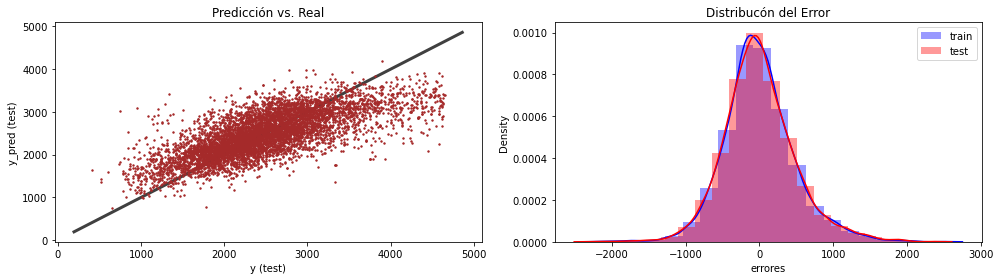

In [162]:
reg_lasso = Lasso(alpha = 0.00001,max_iter= 2000)
reg_lasso.fit(X_train1,y_train)
evaluacion_modelo(reg_lasso,X_train1,X_test1,y_train,y_test)

In [163]:
results = cross_validate(reg_lasso, X_train1, y_train, cv=5, 
                         return_train_score=True, 
                         scoring=('r2','neg_root_mean_squared_error'))
print('Mean r2 test: ', np.mean(results['test_r2']))
print('RMSE test: ',np.abs(np.mean(results['test_neg_root_mean_squared_error'])))

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.435e+09, tolerance: 6.069e+05

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.401e+09, tolerance: 6.045e+05

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.414e+09, tolerance: 6.119e+05

/Applications/anaconda3/lib/python3.8/si

Mean r2 test:  0.5122343202549017
RMSE test:  491.5877710997217


/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.402e+09, tolerance: 6.075e+05

